In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas
import itertools
import copy
import sys

In [2]:
fileDir = "./outputMSE/"
maeList = [os.path.join(fileDir,x) for x in os.listdir(fileDir)]

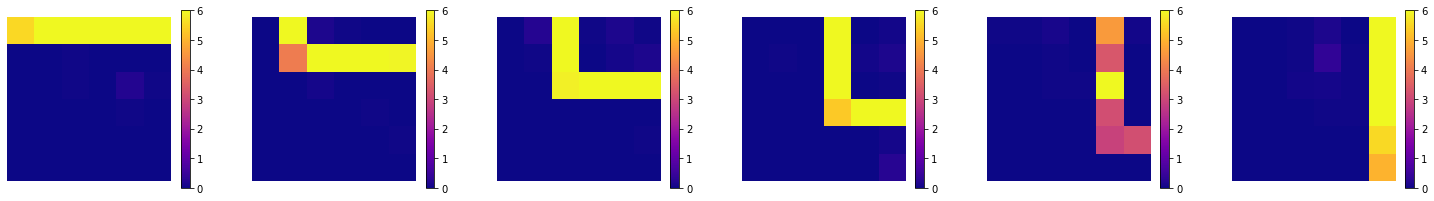

In [3]:
plt.rcParams["figure.figsize"] = [6.4*4,4.8*4]

for mae in maeList:
    arr = np.load(mae)

    fig,ax = plt.subplots(1,arr.shape[0])
    for i in range(arr.shape[0]):
        im = ax[i].imshow(arr[i,:,:],cmap="plasma",vmax=6)
        ax[i].axis("off")
        fig.colorbar(im,ax=ax[i],shrink=0.17)

    plt.show()
    break

In [4]:
maeList[0]

'./outputMSE/1009520_20254_2_0.npy'

In [5]:

df = []
knNums = list(itertools.combinations_with_replacement([0,1,2,3,4,5],2))
for mae in maeList:
    arr = np.load(mae)

    eid = mae.split("/")
    tempDict = {"Eid": eid[-1][:7]}
    for kn0,kn1 in knNums:
        for i in range(arr.shape[0]):
            tempDict["Ch_{}_Kn_{}{}".format(i,kn0,kn1)] = arr[i,kn0,kn1]
    df.append(tempDict)

df = pandas.DataFrame(df)

df

,Eid,Ch_0_Kn_00,Ch_1_Kn_00,Ch_2_Kn_00,Ch_3_Kn_00,Ch_4_Kn_00,Ch_5_Kn_00,Ch_0_Kn_01,Ch_1_Kn_01,Ch_2_Kn_01,...,Ch_2_Kn_45,Ch_3_Kn_45,Ch_4_Kn_45,Ch_5_Kn_45,Ch_0_Kn_55,Ch_1_Kn_55,Ch_2_Kn_55,Ch_3_Kn_55,Ch_4_Kn_55,Ch_5_Kn_55
0,1009520,5.543783,0.014680,0.017195,0.004440,0.040677,0.002516,11.395439,14.687372,0.251369,...,0.038616,0.076081,3.168779,5.557605,0.002842,0.008461,0.008209,0.273324,0.004823,5.013015
1,1016068,6.858246,0.017155,0.003373,0.006768,0.007587,0.013668,11.529116,10.169241,0.027561,...,0.058729,0.127907,3.393643,3.050185,0.000804,0.040358,0.004477,0.243408,0.023439,2.753627
2,1021871,7.654672,0.005090,0.009621,0.023696,0.010137,0.005188,12.508202,10.140021,0.238318,...,0.024021,0.023541,2.233064,3.432407,0.003251,0.002007,0.006957,0.125722,0.003634,2.755250
3,1031579,4.933551,0.011589,0.014803,0.006968,0.056657,0.080711,22.394154,13.173778,0.165131,...,0.084165,0.015604,2.791912,5.428104,0.001469,0.049312,0.006500,0.006611,0.004848,5.224380
4,1036691,15.428579,0.027588,0.005837,0.020120,0.090815,0.022700,39.792931,29.350330,0.101347,...,0.065660,0.035283,10.206590,9.476458,0.000927,0.008889,0.007097,0.016750,0.033707,10.204288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6021011,10.594635,0.003425,0.014507,0.004003,0.018052,0.003209,17.932693,7.674324,0.120448,...,0.032995,0.022956,2.385105,2.946368,0.002047,0.000901,0.008973,0.009830,0.006452,2.477109
996,6021919,2.998672,0.008081,0.008929,0.003853,0.021326,0.002389,9.679838,14.233779,0.161225,...,0.111067,0.039627,1.742615,4.879675,0.001301,0.005811,0.008257,0.055541,0.004351,4.472304
997,6022224,20.722944,0.012808,0.024844,0.003742,0.062230,0.079413,35.519604,14.438251,0.155463,...,0.033977,0.013818,4.354609,3.945435,0.003690,0.017448,0.011404,0.022860,0.024171,2.952329
998,6024254,8.910383,0.019139,0.005399,0.017588,0.082468,0.014463,32.523830,22.303469,0.262634,...,0.061942,0.087506,4.973884,6.304276,0.005210,0.020611,0.008412,0.121331,0.014932,6.655518


## Norm by column

In [6]:
keys = []
for kn0,kn1 in knNums:
    for i in range(arr.shape[0]):
        keys.append("Ch_{}_Kn_{}{}".format(i,kn0,kn1))

In [7]:
dfNorm = copy.deepcopy(df)
for k in keys:
    dfNorm[k] = (dfNorm[k]-dfNorm[k].min())/(dfNorm[k].max()-dfNorm[k].min())

dfNorm

,Eid,Ch_0_Kn_00,Ch_1_Kn_00,Ch_2_Kn_00,Ch_3_Kn_00,Ch_4_Kn_00,Ch_5_Kn_00,Ch_0_Kn_01,Ch_1_Kn_01,Ch_2_Kn_01,...,Ch_2_Kn_45,Ch_3_Kn_45,Ch_4_Kn_45,Ch_5_Kn_45,Ch_0_Kn_55,Ch_1_Kn_55,Ch_2_Kn_55,Ch_3_Kn_55,Ch_4_Kn_55,Ch_5_Kn_55
0,1009520,0.084526,0.020836,0.005450,0.006695,0.009085,0.002007,0.042949,0.200316,0.086550,...,0.042553,0.072561,0.145923,0.359213,0.000557,0.013274,0.031138,0.050961,0.000848,0.316659
1,1016068,0.114254,0.024675,0.000160,0.010376,0.001323,0.015338,0.044115,0.114333,0.005676,...,0.074857,0.124391,0.160183,0.136382,0.000059,0.064073,0.001898,0.045362,0.005741,0.133756
2,1021871,0.132267,0.005960,0.002551,0.037141,0.001921,0.005201,0.052657,0.113777,0.081834,...,0.019113,0.020018,0.086583,0.170350,0.000658,0.002997,0.021332,0.023335,0.000536,0.133888
3,1031579,0.070725,0.016042,0.004534,0.010693,0.012834,0.095474,0.138908,0.171511,0.055387,...,0.115709,0.012081,0.122023,0.347704,0.000221,0.078332,0.017749,0.001042,0.000855,0.333769
4,1036691,0.308086,0.040860,0.001103,0.031487,0.020847,0.026133,0.290706,0.479365,0.032339,...,0.085988,0.031761,0.592233,0.707475,0.000089,0.013956,0.022429,0.002939,0.008440,0.736904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6021011,0.198759,0.003378,0.004421,0.006004,0.003778,0.002836,0.099984,0.066852,0.039241,...,0.033526,0.019434,0.096225,0.127156,0.000363,0.001235,0.037129,0.001644,0.001276,0.111371
996,6021919,0.026964,0.010600,0.002286,0.005768,0.004546,0.001855,0.027981,0.191684,0.053976,...,0.158916,0.036105,0.055481,0.298966,0.000180,0.009055,0.031517,0.010200,0.000724,0.272887
997,6022224,0.427826,0.017932,0.008377,0.005592,0.014142,0.093922,0.253423,0.195575,0.051894,...,0.035103,0.010295,0.221123,0.215942,0.000765,0.027588,0.056174,0.004083,0.005934,0.149841
998,6024254,0.160667,0.027753,0.000935,0.027483,0.018889,0.016287,0.227286,0.345257,0.090620,...,0.080017,0.083987,0.260395,0.425569,0.001137,0.032624,0.032730,0.022514,0.003505,0.449623


## ROC Curves

In [8]:
reasonsFiles = [os.path.join("./reasons/",x) for x in os.listdir("./reasons/") if x.startswith("pdff")]

rejectList = []
for fN in reasonsFiles:
    with open(fN,"r") as f:
        for line in f:
            rejectList.append(line.strip())


In [9]:
rejectReduced = []
for i,j in dfNorm.iterrows():
    if j["Eid"] in rejectList:
        rejectReduced.append(1)
    else:
        rejectReduced.append(0)

dfNorm["Reacquire"] = rejectReduced
    
dfNorm

,Eid,Ch_0_Kn_00,Ch_1_Kn_00,Ch_2_Kn_00,Ch_3_Kn_00,Ch_4_Kn_00,Ch_5_Kn_00,Ch_0_Kn_01,Ch_1_Kn_01,Ch_2_Kn_01,...,Ch_3_Kn_45,Ch_4_Kn_45,Ch_5_Kn_45,Ch_0_Kn_55,Ch_1_Kn_55,Ch_2_Kn_55,Ch_3_Kn_55,Ch_4_Kn_55,Ch_5_Kn_55,Reacquire
0,1009520,0.084526,0.020836,0.005450,0.006695,0.009085,0.002007,0.042949,0.200316,0.086550,...,0.072561,0.145923,0.359213,0.000557,0.013274,0.031138,0.050961,0.000848,0.316659,1
1,1016068,0.114254,0.024675,0.000160,0.010376,0.001323,0.015338,0.044115,0.114333,0.005676,...,0.124391,0.160183,0.136382,0.000059,0.064073,0.001898,0.045362,0.005741,0.133756,0
2,1021871,0.132267,0.005960,0.002551,0.037141,0.001921,0.005201,0.052657,0.113777,0.081834,...,0.020018,0.086583,0.170350,0.000658,0.002997,0.021332,0.023335,0.000536,0.133888,0
3,1031579,0.070725,0.016042,0.004534,0.010693,0.012834,0.095474,0.138908,0.171511,0.055387,...,0.012081,0.122023,0.347704,0.000221,0.078332,0.017749,0.001042,0.000855,0.333769,0
4,1036691,0.308086,0.040860,0.001103,0.031487,0.020847,0.026133,0.290706,0.479365,0.032339,...,0.031761,0.592233,0.707475,0.000089,0.013956,0.022429,0.002939,0.008440,0.736904,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6021011,0.198759,0.003378,0.004421,0.006004,0.003778,0.002836,0.099984,0.066852,0.039241,...,0.019434,0.096225,0.127156,0.000363,0.001235,0.037129,0.001644,0.001276,0.111371,0
996,6021919,0.026964,0.010600,0.002286,0.005768,0.004546,0.001855,0.027981,0.191684,0.053976,...,0.036105,0.055481,0.298966,0.000180,0.009055,0.031517,0.010200,0.000724,0.272887,0
997,6022224,0.427826,0.017932,0.008377,0.005592,0.014142,0.093922,0.253423,0.195575,0.051894,...,0.010295,0.221123,0.215942,0.000765,0.027588,0.056174,0.004083,0.005934,0.149841,0
998,6024254,0.160667,0.027753,0.000935,0.027483,0.018889,0.016287,0.227286,0.345257,0.090620,...,0.083987,0.260395,0.425569,0.001137,0.032624,0.032730,0.022514,0.003505,0.449623,1


In [10]:
from sklearn.metrics import roc_curve, auc

dotLine = [0,1]

plt.rcParams["figure.figsize"] = [6*4,21*4]

# fig,ax = plt.subplots(21,6)
cntI = 0
highAuc = {}
allAUC = {}
for i,(kn0,kn1) in enumerate(knNums):
    for ch in range(6):
        pred = dfNorm["Ch_{}_Kn_{}{}".format(ch,kn0,kn1)].to_numpy()
        gt = dfNorm["Reacquire"].to_numpy()

        fpr,tpr,thresh = roc_curve(gt,pred)
        aucScore = auc(fpr,tpr)
        
        if aucScore > 0.65:
            highAuc["Ch_{}_Kn_{}{}".format(ch,kn0,kn1)] = pred

        allAUC["Ch_{}_Kn_{}{}".format(ch,kn0,kn1)] = pred

#         ax[i,ch].plot(fpr,tpr,label="{:.3f}".format(aucScore))
#         ax[i,ch].plot(dotLine,dotLine,"--")
#         ax[i,ch].legend(prop={'size':10})

# plt.show()


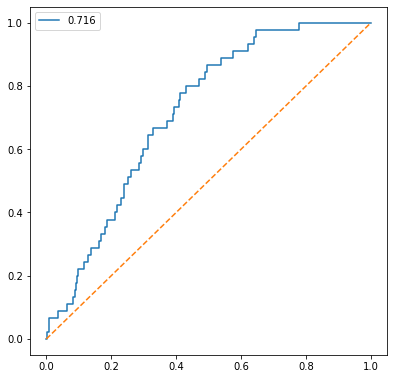

In [11]:
overPred = np.ones(pred.shape)
for k in highAuc.keys():
    overPred *= highAuc[k]

gt = dfNorm["Reacquire"].to_numpy()
fpr,tpr,thresh = roc_curve(gt,overPred)
aucScore = auc(fpr,tpr)

plt.rcParams["figure.figsize"] = [6.4,6.4]
plt.plot(fpr,tpr,label="{:.3f}".format(aucScore))
plt.plot(dotLine,dotLine,"--")
plt.legend(prop={'size':10})
plt.show()

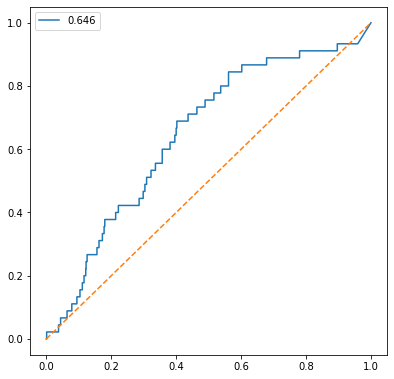

In [12]:
overPred = np.ones(pred.shape)
for k in allAUC.keys():
    overPred *= allAUC[k]

gt = dfNorm["Reacquire"].to_numpy()
fpr,tpr,thresh = roc_curve(gt,overPred)
aucScore = auc(fpr,tpr)

plt.rcParams["figure.figsize"] = [6.4,6.4]
plt.plot(fpr,tpr,label="{:.3f}".format(aucScore))
plt.plot(dotLine,dotLine,"--")
plt.legend(prop={'size':10})
plt.show()

## SVM

In [13]:
dfBad = dfNorm[dfNorm["Reacquire"] == 1]
dfGood = dfNorm[dfNorm["Reacquire"] == 0]

trainBad = dfBad[:len(dfBad)//2]
testBad = dfBad[len(dfBad)//2:]

trainGood = dfGood[:len(dfGood)//2]
testGood = dfGood[len(dfGood)//2:]

npDf = np.concatenate((trainBad.to_numpy(),trainGood.to_numpy()))
trainFeatures = npDf[:,1:-1]
trainClass = npDf[:,-1]
trainEids = npDf[:,0]

npDf = np.concatenate((testBad.to_numpy(),testGood.to_numpy()))
testFeatures = npDf[:,1:-1]
testClass = npDf[:,-1]
testEids = npDf[:,0]

trainFeatures = trainFeatures.astype(float)
trainClass = trainClass.astype(float)
testFeatures = testFeatures.astype(float)
testClass = testClass.astype(float)

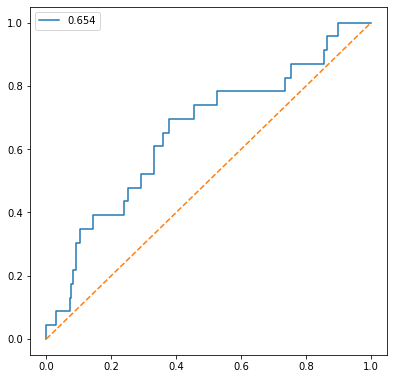

In [14]:
from sklearn.svm import SVC

clf = SVC(probability=True)

clf.fit(trainFeatures,trainClass)

out = clf.predict_proba(testFeatures)
out = out[:,1]

fpr,tpr,thresh = roc_curve(testClass,out)
aucScore = auc(fpr,tpr)

plt.rcParams["figure.figsize"] = [6.4,6.4]
plt.plot(fpr,tpr,label="{:.3f}".format(aucScore))
plt.plot(dotLine,dotLine,"--")
plt.legend(prop={'size':10})
plt.show()

## Rando Forro

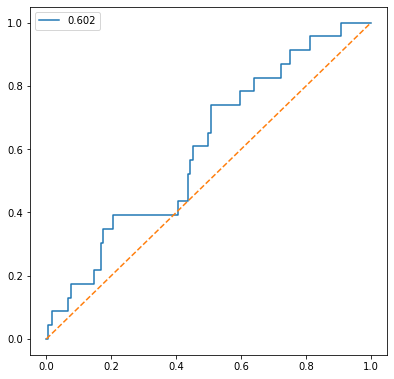

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5)

clf.fit(trainFeatures,trainClass)

out = clf.predict_proba(testFeatures)
out = out[:,1]

fpr,tpr,thresh = roc_curve(testClass,out)
aucScore = auc(fpr,tpr)

plt.rcParams["figure.figsize"] = [6.4,6.4]
plt.plot(fpr,tpr,label="{:.3f}".format(aucScore))
plt.plot(dotLine,dotLine,"--")
plt.legend(prop={'size':10})
plt.show()

## DENSE

In [16]:
from sklearn.utils.testing import ignore_warnings
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, custom_metric=None)
models,predictions = clf.fit(trainFeatures, testFeatures, trainClass, testClass)

print(models)

# fpr,tpr,thresh = roc_curve(testClass,out)
# aucScore = auc(fpr,tpr)

# plt.rcParams["figure.figsize"] = [6.4,6.4]
# plt.plot(fpr,tpr,label="{:.3f}".format(aucScore))
# plt.plot(dotLine,dotLine,"--")
# plt.legend(prop={'size':10})
# plt.show()

C:\Users\Charl\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [00:02<00:00, 13.58it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.71               0.64     0.64      0.80   
NearestCentroid                    0.83               0.60     0.60      0.87   
GaussianNB                         0.92               0.54     0.54      0.92   
Perceptron                         0.92               0.52     0.52      0.92   
XGBClassifier                      0.96               0.52     0.52      0.94   
RandomForestClassifier             0.95               0.52     0.52      0.93   
RidgeClassifierCV                  0.95               0.52     0.52      0.93   
DecisionTreeClassifier             0.91               0.52     0.52      0.91   
ExtraTreeClassifier                0.90               0.52     0.52      0.91   
BaggingClassifier                  0.94               0.51     0.51      0.93   
LinearSVC                   